In [83]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [84]:
#import the data
CADEUR = yf.Ticker("CADEUR=X")

In [85]:
data = yf.download("CADEUR=X", start="2017-01-01", end="2022-08-10")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [86]:
data.head()

Date
2017-01-02    0.70686
2017-01-03    0.71110
2017-01-04    0.71480
2017-01-05    0.71580
2017-01-06    0.71250
Name: Adj Close, dtype: float64

In [87]:
data.tail()

Date
2022-08-04    0.76584
2022-08-05    0.75813
2022-08-08    0.75947
2022-08-09    0.76265
2022-08-10    0.76013
Name: Adj Close, dtype: float64

In [88]:
log_returns = np.log(1 + data.pct_change())

In [89]:
log_returns.tail()

Date
2022-08-04    0.002471
2022-08-05   -0.010118
2022-08-08    0.001766
2022-08-09    0.004178
2022-08-10   -0.003310
Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price CAD')

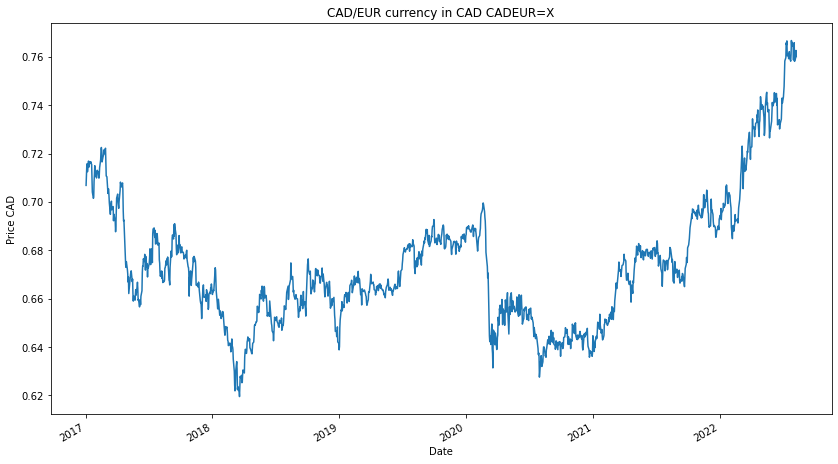

In [90]:
data.plot(figsize=(14,8))
plt.title('CAD/EUR currency in CAD CADEUR=X')
plt.ylabel('Price CAD')

In [91]:
u = log_returns.mean()
u

4.9764945878041514e-05

In [92]:
var = log_returns.var()
var

2.059844466938641e-05

In [93]:
stdev = log_returns.std()
stdev

0.004538550943791026

In [94]:
drift = u - (0.5 * var)
drift

3.946572354334831e-05

In [95]:
np.array(drift)

array(3.94657235e-05)

In [96]:
np.array(stdev)

array(0.00453855)

In [97]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [98]:
x = np.random.rand(10,2)
x

array([[0.94032226, 0.52391262],
       [0.18022165, 0.37139601],
       [0.12388165, 0.38483377],
       [0.49195742, 0.1770208 ],
       [0.91819511, 0.54489485],
       [0.84819328, 0.26951483],
       [0.61703661, 0.4134814 ],
       [0.68420746, 0.97448832],
       [0.15091744, 0.76814316],
       [0.9341511 , 0.87929562]])

In [99]:
norm.ppf(x)

array([[ 1.5574846 ,  0.05997599],
       [-0.91452073, -0.32815823],
       [-1.15579922, -0.2928098 ],
       [-0.02016113, -0.92677842],
       [ 1.39303312,  0.11277327],
       [ 1.02871537, -0.614281  ],
       [ 0.29770703, -0.21859852],
       [ 0.47949703,  1.95128326],
       [-1.03250657,  0.73274546],
       [ 1.50744046,  1.17147287]])

In [100]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.80582357, -1.1163445 ],
       [ 1.6761862 , -1.2632493 ],
       [-1.03853623, -0.0392188 ],
       [-1.52234473, -0.4805018 ],
       [ 0.71924746,  0.07689067],
       [ 1.37618201,  0.74149587],
       [ 1.33443519,  0.33936633],
       [-0.00910141, -0.38124571],
       [-0.77441473,  0.17572011],
       [ 1.04408863, -2.52217931]])

In [101]:
t_intervals = 120
interations = 500

In [102]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[1.00124089, 1.0043776 , 1.00262169, ..., 0.99803641, 1.00725927,
        0.9960809 ],
       [0.99705282, 1.00094027, 0.99135641, ..., 0.99862814, 0.99740669,
        0.99546664],
       [1.00437832, 1.00042579, 1.00133342, ..., 1.00427425, 1.00204346,
        1.00253195],
       ...,
       [0.99749329, 0.99631089, 1.00083342, ..., 0.99456488, 1.0088699 ,
        0.999011  ],
       [1.00470165, 1.00022281, 0.9990917 , ..., 1.00080195, 0.99844302,
        0.99108723],
       [0.98857654, 1.01015836, 1.00004344, ..., 1.00072682, 0.99566215,
        1.00234563]])

In [103]:
s_zero = data.iloc[-1]
s_zero

0.760129988193512

In [104]:
price_list = np.zeros_like(daily_returns)

In [105]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [106]:
price_list[0] = s_zero
price_list

array([[0.76012999, 0.76012999, 0.76012999, ..., 0.76012999, 0.76012999,
        0.76012999],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [107]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [108]:
price_list

array([[0.76012999, 0.76012999, 0.76012999, ..., 0.76012999, 0.76012999,
        0.76012999],
       [0.75788975, 0.76084471, 0.75355974, ..., 0.7590872 , 0.75815874,
        0.75668405],
       [0.76120804, 0.76116867, 0.75456455, ..., 0.76233172, 0.759708  ,
        0.75859993],
       ...,
       [0.7569111 , 0.74051875, 0.74532241, ..., 0.7735158 , 0.78519071,
        0.76101992],
       [0.76046982, 0.74068374, 0.74464543, ..., 0.77413613, 0.78396818,
        0.75423713],
       [0.75178263, 0.74820787, 0.74467778, ..., 0.77469878, 0.78056745,
        0.75600629]])

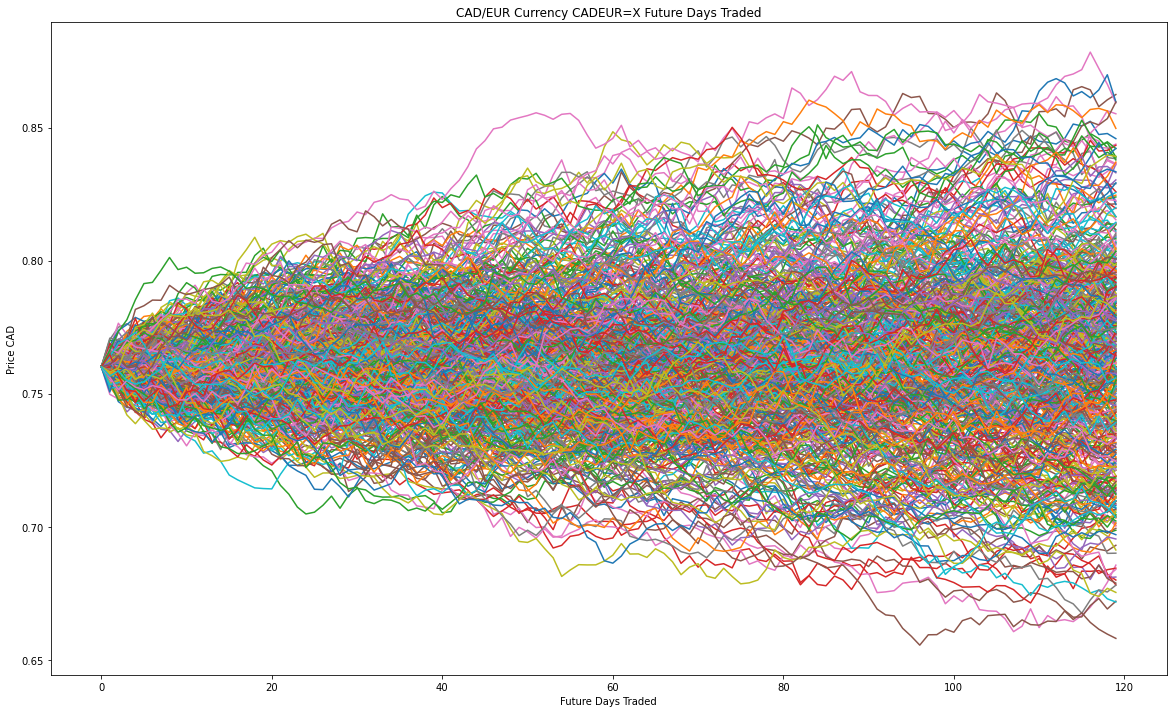

In [109]:
plt.figure(figsize=(20,12))
plt.title('CAD/EUR Currency CADEUR=X Future Days Traded')
plt.xlabel('Future Days Traded')
plt.ylabel('Price CAD')
plt.plot(price_list)